In [13]:
import sympy as sy
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [14]:
alpha = sy.Symbol('alpha')
tmat = np.array([[0.9, 0.1], [alpha, 1-alpha]])
print('Transition matrix is:')
print(tmat)

Transition matrix is:
[[0.9 0.1]
 [alpha -alpha + 1]]


At the steady state, $[0.9, 0.1] * tmat = [0.9, 0.1]$ <br/>
Solving we get alpha = 0.9.

In [15]:
#Get kstar
def get_kbar_guess(beta, delta, alpha, u):
    kbar = (alpha*beta/(1 - beta*(1- delta)))**(1/(1 - alpha))
    return kbar

beta = 0.96
delta = 0.06
alpha = 0.36
u = 0.1
N = 200
threshold = 1e-5
k_low, k_high = 0.001, 40
transition = np.array([[0.9, 0.1], [0.9, 0.1]])
params = [beta, delta, alpha, u, N, threshold, transition, k_low, k_high]
kbar = get_kbar_guess(beta, delta, alpha, u)

In [18]:
def solver1(kbar, params):    
    np.random.seed(25)
    beta, delta, alpha, u, N, threshold, transition, k_low, k_high = params
    kgrid = np.linspace(k_low, k_high, N)
    difference = 10000
    V_old = np.zeros((2,N))
    V_new = np.zeros_like(V_old)
    c = np.zeros_like(V_old)
    policyfun = np.zeros_like(V_old)
    itr = 1
    
    while difference > threshold:
        print("Iteration:", str(itr), str(difference))
        for i in range(len(kgrid)):
            k = kgrid[i]
            r = alpha*kbar**(alpha - 1)*(1 - u)**(1 - alpha)
            w = (1 - alpha)*kbar**(alpha)*(1 - u)**(-alpha)
            c[0, :] = r*k + w*1 + (1 - delta)*k - kgrid
            c[1, :] = r*k + w*0 + (1 - delta)*k - kgrid   
            obj = np.zeros_like(V_old)
            obj[c <= 0] = -99999999 
            obj[c > 0]= np.log(c[c > 0])
            V_almost = obj + beta*(np.dot(transition, V_old))
            V_new[:, i] = np.amax(V_almost, axis = 1) 
            max_indicies = np.argmax(V_almost, axis = 1)
            policyfun[:, i] = kgrid[max_indicies]
        difference = np.linalg.norm(V_new - V_old)**(2)
        V_old = V_new.copy()
        itr += 1
        
    return policyfun, V_new, kgrid
    
policyfun, V_new, kgrid = solver1(kbar, params)

Iteration: 1 10000
Iteration: 2 3544.173925421872
Iteration: 3 1123.6695876991887
Iteration: 4 633.111330591927
Iteration: 5 410.384839244539
Iteration: 6 286.5146179729627
Iteration: 7 209.80414873741313
Iteration: 8 158.9248929679551
Iteration: 9 123.49659614493426
Iteration: 10 97.9167626632225
Iteration: 11 78.90506968221479
Iteration: 12 64.44009798419488
Iteration: 13 53.22286634870946
Iteration: 14 44.38474663416775
Iteration: 15 37.32083781617209
Iteration: 16 31.607799195911984
Iteration: 17 26.938607051438826
Iteration: 18 23.088231784134766
Iteration: 19 19.88450039904541
Iteration: 20 17.204353407284284
Iteration: 21 14.940720488140991
Iteration: 22 13.025268717052809
Iteration: 23 11.38763854938902
Iteration: 24 9.98981639811655
Iteration: 25 8.7843389222648
Iteration: 26 7.74124247522147
Iteration: 27 6.840997099710096
Iteration: 28 6.056867567502121
Iteration: 29 5.370240886294559
Iteration: 30 4.769647358388432
Iteration: 31 4.245438866892129
Iteration: 32 3.78490594197

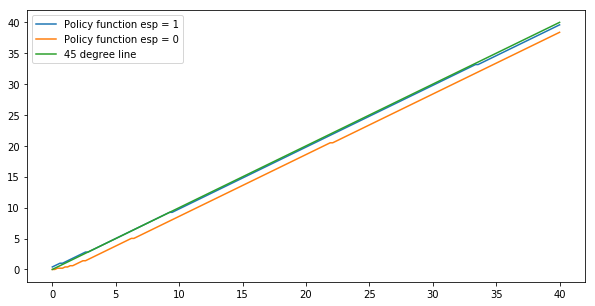

In [19]:
fig = plt.figure(figsize = (10, 5))
plt.plot(kgrid, policyfun[0, :], label = "Policy function esp = 1")
plt.plot(kgrid, policyfun[1, :], label = "Policy function esp = 0")
plt.plot(kgrid, kgrid, label = "45 degree line")
plt.legend()
plt.show()

In [21]:
def solver2(params, kbar):
    t = 10000
    tol = 0.0001
    max_iter = 10000
    capital_series = np.zeros(t)
    itr = 1
    diff = 10000
    np.random.seed(25)
    
    while (diff > tol and itr <= max_iter):
        print("Iteration:", str(itr), str(diff))
        policyfun, V_new, kgrid =  hetagents(kbar, params)
        k = random.choice(kgrid)
        capital_series[0] = k

        for i in range(1, t):
            epsilon = np.random.binomial(1, 0.9, 1)
            if epsilon == 1:
                k = policyfun[0, np.where(kgrid == k)[0]]
            else:
                k = policyfun[1, np.where(kgrid == k)[0]]
            capital_series[i] = k
        kbar_new = np.mean(capital_series)
        diff = kbar_new - kbar
        kbar = kbar_new.copy()
        itr += 1
    
    return kbar_new

In [22]:
solver2(params, kbar)

Iteration: 1 10000
Iteration: 1 10000
Iteration: 2 3544.173925421872
Iteration: 3 1123.6695876991887
Iteration: 4 633.111330591927
Iteration: 5 410.384839244539
Iteration: 6 286.5146179729627
Iteration: 7 209.80414873741313
Iteration: 8 158.9248929679551
Iteration: 9 123.49659614493426
Iteration: 10 97.9167626632225
Iteration: 11 78.90506968221479
Iteration: 12 64.44009798419488
Iteration: 13 53.22286634870946
Iteration: 14 44.38474663416775
Iteration: 15 37.32083781617209
Iteration: 16 31.607799195911984
Iteration: 17 26.938607051438826
Iteration: 18 23.088231784134766
Iteration: 19 19.88450039904541
Iteration: 20 17.204353407284284
Iteration: 21 14.940720488140991
Iteration: 22 13.025268717052809
Iteration: 23 11.38763854938902
Iteration: 24 9.98981639811655
Iteration: 25 8.7843389222648
Iteration: 26 7.74124247522147
Iteration: 27 6.840997099710096
Iteration: 28 6.056867567502121
Iteration: 29 5.370240886294559
Iteration: 30 4.769647358388432
Iteration: 31 4.245438866892129
Iteratio

2.277325